## Group No

## Group Member Names:
1. 
2.
3.
4. 

## Journal used for the implemetation
Journal title: "Transformer-based Temporal Convolutional Networks for Long-term Time Series Forecasting"

Authors: Shiwei Sun, Yuliang Shi, Junjie Ye, Yuxuan Liang, Mingxuan Yuan, Yu Zheng

Journal Name: Proceedings of the AAAI Conference on Artificial Intelligence (AAAI)

Year: 2023


# Paper Summary:
## Objectives:
The paper aims to improve the accuracy and efficiency of long-term time series forecasting by combining the strengths of Transformer models (for capturing long-range dependencies) and Temporal Convolutional Networks (TCNs) (for efficient local feature extraction).
## Methodologies/Algorithms Implemented:
The paper proposes a Transformer-TCN hybrid model. Specifically, it uses TCN blocks to extract local features from the input time series, followed by a Transformer encoder to capture long-range dependencies. The output of the Transformer encoder is then fed into a linear layer for final forecasting.
## Significance of the Study:
Long-term time series forecasting is a challenging task due to the complex temporal dependencies and the need to capture both local and global patterns. This paper addresses this challenge by effectively combining the strengths of two powerful architectures, leading to improved forecasting accuracy.


# 1. Import the required libraries

In [1]:
##---------Type the code below this line------------------##
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



In [5]:
##---------Type the code below this line------------------##
# Data Source: Electricity Transformer Temperature (ETT) dataset (ETTh1)
# URL: https://github.com/zhouhaoyi/ETDataset/blob/main/ETT-small/ETTh1.csv

!wget -O ETTh1.csv "https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTh1.csv"

data = pd.read_csv("ETTh1.csv")
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data.head()

--2025-03-01 07:49:28--  https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTh1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2589657 (2.5M) [text/plain]
Saving to: ‘ETTh1.csv’

ETTh1.csv           100%[===================>]   2.47M  10.6MB/s    in 0.2s    

2025-03-01 07:49:29 (10.6 MB/s) - ‘ETTh1.csv’ saved [2589657/2589657]



,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into training set and testing set
##---------Type the code below this line------------------##
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_sequences(data, seq_length, target_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length - target_length + 1):
        x = data[i:(i + seq_length)]
        y = data[(i + seq_length):(i + seq_length + target_length), 0] #Predicting OT
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 96 #Input sequence length
target_length = 24 #Output sequence length
X_train, y_train = create_sequences(train_data, seq_length, target_length)
X_test, y_test = create_sequences(test_data, seq_length, target_length)

# Identify the target variables.
##---------Type the code below this line------------------##
# Target variable is 'OT' (Oil Temperature)

## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



In [12]:
##---------Type the code below this line------------------##

def transformer_tcn_model(input_shape, target_length):
    inputs = keras.layers.Input(shape=input_shape)

    # TCN Blocks
    x = keras.layers.Conv1D(64, 3, padding='same', activation='relu', dilation_rate=1)(inputs)
    x = keras.layers.Conv1D(64, 3, padding='same', activation='relu', dilation_rate=2)(x)
    x = keras.layers.Conv1D(64, 3, padding='same', activation='relu', dilation_rate=4)(x)

    # Transformer Encoder
    x = keras.layers.Permute((2, 1))(x) # Transpose for Transformer
    x = keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)(x, x)
    x = keras.layers.LayerNormalization(epsilon=1e-6)(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    x = keras.layers.Dense(64)(x)
    x = keras.layers.LayerNormalization(epsilon=1e-6)(x)
    x = keras.layers.Permute((2, 1))(x) # Transpose back

    # Output Layer
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(target_length)(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model = transformer_tcn_model((seq_length, X_train.shape[2]), target_length)


## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 7)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 96, 64)         │          1,408 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 96, 64)         │         12,352 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 96, 64)         │         12,352 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute (Permute)         │ (None, 64, 96)         │              0 │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 64, 96)         │        198,240 │ permute[0][0],         │
│ (MultiHeadAttention)      │                        │                │ permute[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 64, 96)         │            192 │ multi_head_attention[… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64, 64)         │          6,208 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64, 64)         │          4,160 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 64, 64)         │            128 │ dense_1[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute_1 (Permute)       │ (None, 64, 64)         │              0 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 4096)           │              0 │ permute_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 24)             │         98,328 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,000,106 (3.82 MB)

 Trainable params: 333,368 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 666,738 (2.54 MB)

# 5. Training the model 


In [8]:
# Configure the training, by using appropriate optimizers, regularizations and loss functions
##---------Type the code below this line------------------##

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - loss: 0.7781 - val_loss: 0.4927
Epoch 2/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - loss: 0.2645 - val_loss: 0.5020
Epoch 3/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - loss: 0.2280 - val_loss: 0.4810
Epoch 4/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - loss: 0.1983 - val_loss: 0.4920
Epoch 5/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - loss: 0.1631 - val_loss: 0.4455
Epoch 6/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - loss: 0.1432 - val_loss: 0.4707
Epoch 7/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - loss: 0.1254 - val_loss: 0.4913
Epoch 8/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - loss: 0.1063 - val_loss: 0.5215
Epoch 9/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - loss: 0.0957 - val_loss: 0.4854
Epoch 10/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - loss: 0.0847 - val_loss: 0.5186
Epoch 11/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 31s 90ms/step - loss: 0.0784 - val_loss: 0.5012
Epoch 12/50
346/346 ━━━━━━━━━━

# 6. Test the model


In [13]:
##---------Type the code below this line------------------##

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse}, MAE: {mae}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
MSE: 4.081171060632433, MAE: 1.5746164468161628


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


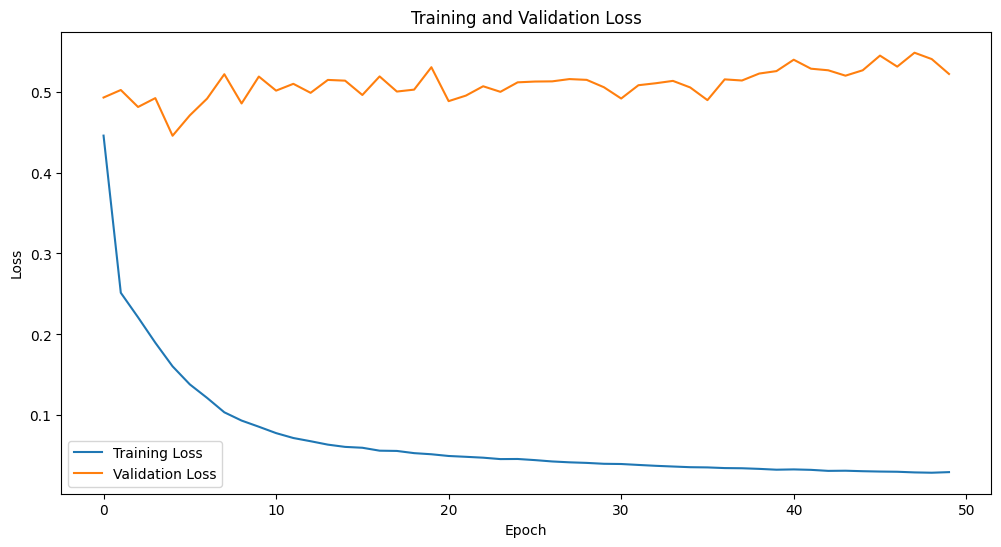

In [14]:
##---------Type the code below this line------------------##

# 1. and 2. Plotting Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck